In [1]:
import numpy as np, curvedsky, prjlib, plottools as pl, tools_y, binning as bn, tools_qrec, pickle
from matplotlib.pyplot import *

In [2]:
mb = bn.multipole_binning(10,lmin=1,lmax=2048)
s = mb.bc**2/2/np.pi

In [3]:
fxtau, fxtbh, fxtBH = {}, {}, {}
for fltr in ['none','cinv']:
    p = prjlib.init_analysis(fltr=fltr,wtype='Lmask',tausig=True)
    qtau, qlen, qsrc, qtbh, qtBH = tools_qrec.init_quad(p.ids,p.stag,rlmin=100,rlmax=2048)
    cy = tools_y.init_compy(p.ids,masktype=0,ytype='milca',ascale=1.0)
    fxtau[fltr] = tools_y.init_cross(qtau,cy,p.ids,p.stag)
    fxtbh[fltr] = tools_y.init_cross(qtbh,cy,p.ids,'bh_'+p.stag)
    fxtBH[fltr] = tools_y.init_cross(qtBH,cy,p.ids,'BH_'+p.stag)

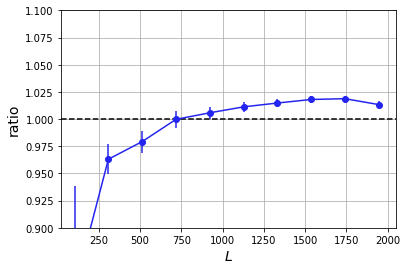

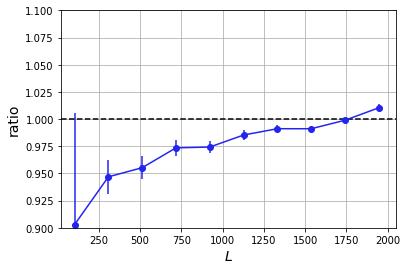

In [15]:
#for xobj in [fxtau['cinv','1.0'],fxtbh['cinv','1.0'],fxtBH['cinv','1.0']]:
l, y0, y1, y2, xl = np.loadtxt(cy.fclyy,unpack=True,usecols=(0,1,2,3,4))
cltt = prjlib.tau_spec(2048)
clty = np.sqrt(y0*cltt)*.9
cbty = bn.binning1(clty,mb)
for xobj in [fxtBH['none'],fxtBH['cinv']]:
    mcb, vcb, scb = bn.binned_spec(mb,xobj.xl,cn=1,doreal=False)
    pl.plot_1dstyle(ymin=.9,ymax=1.1,grid=True,ylab=r'ratio')
    errorbar(mb.bc,mcb/cbty,yerr=vcb/10./cbty,fmt='o-')
    axhline(1.,color='k',ls='--')
    show()